<a href="https://colab.research.google.com/github/mrh-rakib/AI-cybersec/blob/main/lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

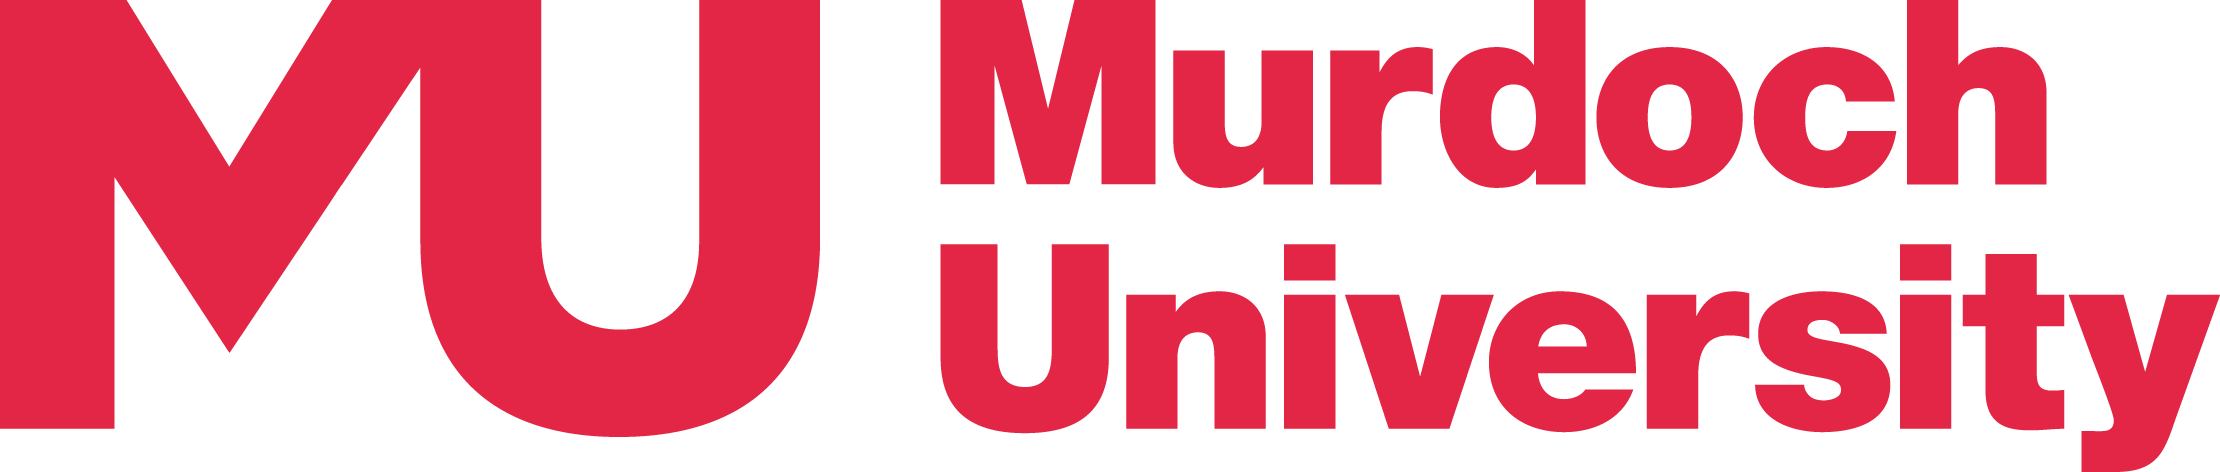

# Lab 6: Intrusion detection with artificial neural network
**Intrusion detection** is the process of monitoring computer networks or systems for unauthorized access or malicious activity. The goal of intrusion detection is to identify any abnormal behavior or security violations in a system or network and alert security personnel or automated response systems to take appropriate action.

In this laboratory, we will use the KDD Cup 1999 dataset, which is a widely used dataset for evaluating intrusion detection systems.

# Load the preprocessed dataset from Lab 5
Download the dataset from [Kaggle](https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data?select=kddcup.data_10_percent.gz). Unzip and upload *kddcup.data_10_percent.gz* file into */content* folder of your colab session. Alternatively, download the *.gz* file from LMS and upload into colab.

Download the *load_KDD1999.ipynb* file from LMS and upload into */content* folder of your colab session.

In [1]:
# initilising variables so that Colab doesn't show warnings
X_train = []
X_test = []
y_train = []
y_test = []

In [2]:
%run load_KDD1999.ipynb

Loaded "X_train" and "X_test" with shapes:
(330994, 29) (163027, 29)

Loaded "y_train" and "y_test" with shapes:
(330994, 1) (163027, 1)


In [3]:
X_train

array([[0.02520187, 1.        , 0.        , ..., 0.82      , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.1567145 , 1.        , 0.        , ..., 0.41      , 0.84      ,
        0.        ],
       [0.        , 0.5       , 0.1       , ..., 0.07      , 0.        ,
        0.        ]])

In [4]:
y_train

,attack_type
482186,1
302290,0
9330,0
91417,1
293169,0
...,...
259178,0
365838,0
131932,0
146867,1


# Building an artificial neural network classifier
Artificial neural network consists of a network of interconnected nodes, or artificial neurons, that can receive input data, process that data through a series of mathematical computations, and produce output data.

The neurons in a neural network are organized into layers, with each layer processing information and passing it on to the next layer until a final output is produced. Neural networks can be trained on a set of labeled data to learn patterns and relationships within that data, and then can be used to make predictions or classify new, unlabeled data.

In a neural network, weights and biases are the parameters that determine the behavior and output of the network.

Weights are the numerical values that are assigned to the connections between neurons in the network. These weights are learned during the training process, where the network is shown a set of labeled input-output pairs and adjusts its weights to minimize the difference between the predicted and actual outputs. The weights essentially control the strength and direction of the connections between neurons, and can greatly affect the accuracy and performance of the network.

Biases, on the other hand, are the values that are added to the output of each neuron in the network. These values are also learned during training, and help to adjust the overall output of the network. Biases can help to account for differences in the data and make the network more flexible and robust.

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu", input_dim=X_train.shape[1]), #1st hidden layer (2nd layer, because 1st layer is the input layer)
    tf.keras.layers.Dense(5, activation="softmax") #output layer
])

* 8 is the number of neurons (or units) in the layer. This is a hyperparameter that can be tuned to control the capacity and complexity of the neural network.
* activation='relu' specifies the activation function to be used for the layer. The 'relu' function is a common choice for hidden layers in neural networks, as it is efficient to compute and has been shown to work well in practice.
* input_dim=X_train.shape[1] specifies the input dimension of the layer. In this case, it indicates that the layer expects an input with X_train.shape[1] features. The input dimension is only required for the first layer of the neural network, as the subsequent layers will automatically infer the input dimension from the output of the previous layer.

In [7]:
X_train.shape[1]

29

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
    )

* optimizer="tf.keras.optimizers.Adam(learning_rate=0.001)" specifies the optimizer algorithm to be used during training. In this case, the Adam optimization algorithm will be used, with learning rate of 0.001. Adam is a popular gradient descent optimization algorithm that is computationally efficient and works well in practice for a wide range of neural network architectures and problems.
* loss="sparse_categorical_crossentropy" specifies the loss function to be used during training. The sparse_categorical_crossentropy loss function is commonly used for multi-class classification problems, where each example belongs to exactly one class. This function calculates the cross-entropy loss between the predicted probabilities and the true class labels, and it is used to measure how well the model is performing during training.
* metrics=["accuracy"] specifies the evaluation metric(s) to be used during training and testing. In this case, the metric being used is "accuracy". This metric calculates the proportion of correctly classified examples out of all the examples in the dataset, and it is a commonly used metric for classification problems.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 240       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
Total params: 285
Trainable params: 285
Non-trainable params: 0
_________________________________________________________________


In [10]:
classify_history = model.fit(X_train,y_train,epochs=5,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/5
10344/10344 [==============================] - 28s 3ms/step - loss: 0.0685 - accuracy: 0.9779 - val_loss: 0.0249 - val_accuracy: 0.9921
Epoch 2/5
10344/10344 [==============================] - 26s 2ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0145 - val_accuracy: 0.9965
Epoch 3/5
10344/10344 [==============================] - 28s 3ms/step - loss: 0.0119 - accuracy: 0.9975 - val_loss: 0.0105 - val_accuracy: 0.9977
Epoch 4/5
10344/10344 [==============================] - 36s 3ms/step - loss: 0.0094 - accuracy: 0.9979 - val_loss: 0.0090 - val_accuracy: 0.9979
Epoch 5/5
10344/10344 [==============================] - 35s 3ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0081 - val_accuracy: 0.9980


* X_train: The input features of the training dataset. This is a NumPy array or Pandas DataFrame that contains the independent variables that will be used to predict the dependent variable.
* y_train: The target variable of the training dataset. This is a NumPy array or Pandas Series that contains the dependent variable that the model is trying to predict.
* epochs=5: The number of times the entire training dataset will be used to update the weights of the neural network model. One epoch is defined as one iteration over the entire training dataset.
* batch_size=32: The number of samples that will be used in each update of the model weights. The training dataset is divided into batches of this size, and the weights are updated after each batch. A smaller batch size can lead to more frequent updates and faster convergence, but it can also increase training time and memory usage.

In [11]:
history_dict = classify_history.history

In [12]:
history_dict

{'loss': [0.06846863031387329,
  0.01934141293168068,
  0.011905970051884651,
  0.009359956718981266,
  0.008224228397011757],
 'accuracy': [0.9779452085494995,
  0.9938730001449585,
  0.997504472732544,
  0.9978911876678467,
  0.9980180859565735],
 'val_loss': [0.024881241843104362,
  0.014520348981022835,
  0.010471446439623833,
  0.008971002884209156,
  0.008090202696621418],
 'val_accuracy': [0.992087185382843,
  0.9965036511421204,
  0.9977120161056519,
  0.9978960752487183,
  0.9980371594429016]}

In [13]:
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
train_acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1,len(train_loss)+1)

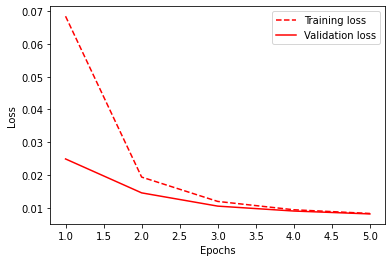

In [14]:
plt.plot(epochs,train_loss,'r--',label="Training loss")
plt.plot(epochs,val_loss,'r',label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

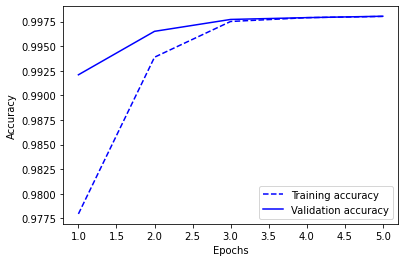

In [15]:
plt.plot(epochs,train_acc,'b--',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Evaluatation by other matrics

## Test accuracy

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
test_pred = model.predict(X_test)

5095/5095 [==============================] - 8s 2ms/step




*   model.predict(X_test) applies the trained neural network model to the input features X_test to generate predicted values for the target variable. The output of this function is a NumPy array containing the predicted values for each sample in the test dataset.



In [18]:
test_pred

array([[9.9999541e-01, 3.5231585e-07, 4.1464268e-06, 7.8288380e-09,
        7.2591549e-10],
       [9.9999541e-01, 3.5231585e-07, 4.1464268e-06, 7.8288380e-09,
        7.2591549e-10],
       [9.9999541e-01, 3.5231585e-07, 4.1464268e-06, 7.8288380e-09,
        7.2591549e-10],
       ...,
       [5.1444810e-04, 9.9946076e-01, 1.2373612e-05, 3.5876571e-06,
        8.8215338e-06],
       [9.9996352e-01, 2.5284456e-07, 2.8890494e-05, 7.1681252e-06,
        2.1692234e-07],
       [9.9999547e-01, 3.5231588e-07, 4.1464273e-06, 7.8288531e-09,
        7.2591555e-10]], dtype=float32)

In [19]:
y_test

,attack_type
317921,0
171422,0
312181,0
87346,1
57449,0
...,...
351572,0
378352,0
33349,1
119307,0


In [20]:
y_pred = np.argmax(test_pred, axis=1)

In [21]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [22]:
test_acc = accuracy_score(y_test, y_pred)

* y_test is the actual target variable values for the test dataset.
* test_pred is the predicted target variable values for the test dataset.
* The np.argmax(test_pred, axis=1) function returns the index of the maximum value in each row of test_pred, which corresponds to the predicted class label.
* accuracy_score(y_test, np.argmax(test_pred, axis=1)) calculates the accuracy of the predicted labels by comparing them to the actual labels in y_test.

In [23]:
test_acc

0.998037134953106

NB: Parts of this program is taken and improved from https://www.kaggle.com/code/iamyajat/intrusion-detection-system-using-neural-networks, which has been released under the Apache 2.0 open source license

## Confusion matrix

In [24]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [25]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [26]:
conf_matrix

array([[129072,     32,      1,      1,      0],
       [    54,  32065,     14,     34,      0],
       [     4,     94,   1249,      1,      0],
       [    12,     53,      1,    321,      0],
       [     0,      9,      0,     10,      0]])

In [27]:
class_names = ['dos','normal','probe','r2l','u2r'] #same sequence as in amap variable in load_KDD1999.ipynb

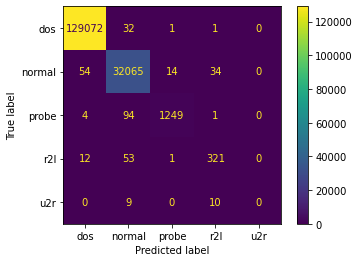

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot()

In [29]:
def plot_cnf_mat(cm,classes,normalize=True): #Normalization can be avoided by setting normalize=False
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    
    print(cm)
    
    plt.figure(figsize=(10,9))
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Greys)
    cbar=plt.colorbar()
    cbar.ax.tick_params(labelsize=18) 
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45,fontsize=24)
    plt.yticks(tick_marks,classes,fontsize=24)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black",fontsize=18)
    
    plt.xlabel('Predicted',fontsize=20)
    plt.ylabel('True',fontsize=20)

Normalized confusion matrix
[[9.99736651e-01 2.47858349e-04 7.74557340e-06 7.74557340e-06
  0.00000000e+00]
 [1.67873908e-03 9.96829048e-01 4.35228650e-04 1.05698387e-03
  0.00000000e+00]
 [2.96735905e-03 6.97329377e-02 9.26557864e-01 7.41839763e-04
  0.00000000e+00]
 [3.10077519e-02 1.36950904e-01 2.58397933e-03 8.29457364e-01
  0.00000000e+00]
 [0.00000000e+00 4.73684211e-01 0.00000000e+00 5.26315789e-01
  0.00000000e+00]]


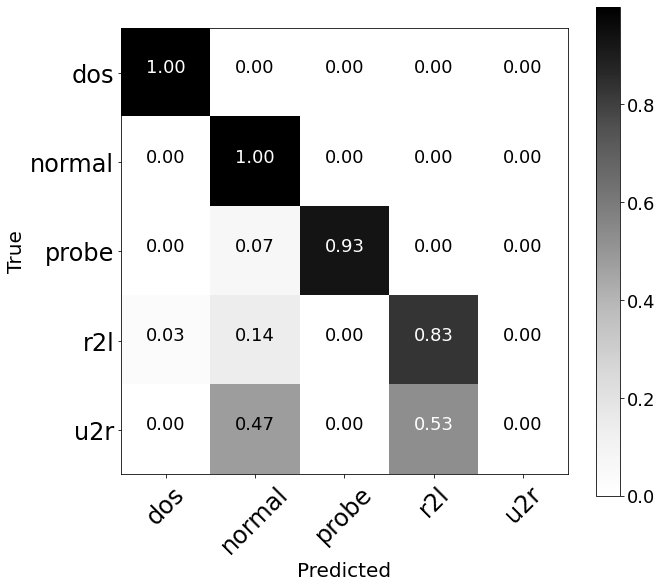

In [30]:
plot_cnf_mat(cm=conf_matrix, classes=class_names)

## F1 score

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_test, y_pred, average='macro')

0.7605087498148634

# Practice task
On the same KDD Cup dataset, develop a different neural network model and report performances (test accuracy, confusion matrix and F1 score) with different hyperparameters (such as, optimizer, activation function, learning rate, etc.).